In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
##Data from SAMHDA - National Survey on Drug Use and Health, 2018

substancecsv = pd.read_csv("Data/Veteran Data/veteransubstance.csv", index_col=[1,0], skipinitialspace=True).drop(['Weighted Count'],axis=1)
substancecsv['Percentage'] = substancecsv['Percentage'].multiply(100)
substancecsv.head()

Percentage
Substance Dependence                 
Alcohol   No/Non-Veteran    98.437551
          No/Veteran        98.143886
          Yes/Non-Veteran    1.562449
          Yes/Veteran        1.856114
Cocaine   No/Non-Veteran    99.923352

In [2]:
# drop "No" answers
substance2csv = pd.read_csv("Data/Veteran Data/veteransubstance.csv", skipinitialspace=True).drop(['Weighted Count'],axis=1)
substance2csv = substance2csv.drop(substance2csv.index[substance2csv['Dependence']=='No/Non-Veteran'])
substance2csv = substance2csv.drop(substance2csv.index[substance2csv['Dependence']=='No/Veteran'])
substance2csv = substance2csv.set_index(['Substance','Dependence'])
substance2csv['Percentage'] = substance2csv['Percentage'].multiply(100)
substance2csv.head()

Percentage
Substance Dependence                 
Alcohol   Yes/Non-Veteran    1.562449
          Yes/Veteran        1.856114
Cocaine   Yes/Non-Veteran    0.076648
          Yes/Veteran        0.037546
Heroin    Yes/Non-Veteran    0.000000

In [3]:
##Data from HUD Exchange, removed all except "Overall" and "Veterans", added p

vetcsv = pd.read_csv("Data/Veteran Data/2018-PIT-Counts Vets.csv",skipinitialspace=True)
vetcsv.head()

,State,Overall Homeless,Homeless Veterans,Percentage
0,AK,2016,132,6.145251
1,AL,3434,339,8.984893
2,AR,2712,251,8.471144
3,AZ,9865,893,8.300799
4,CA,129972,10836,7.695585


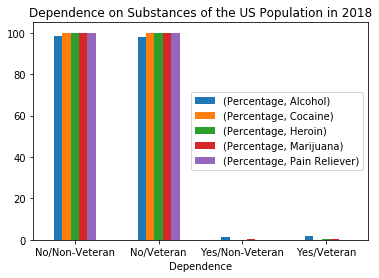

In [4]:
##code from https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
substancecsv.unstack(level=0).plot(kind='bar')

plt.title('Dependence on Substances of the US Population in 2018')
plt.legend(title=None,loc='center right')
plt.tick_params(axis='x',labelrotation=0)
plt.savefig("Images/Dependence on Substances All.png",bbox_inches='tight')
plt.show()

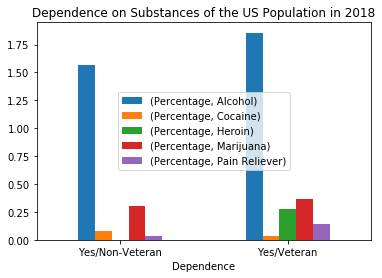

In [5]:
substance2csv.unstack(level=0).plot(kind='bar')

plt.legend(loc='center')
plt.tick_params(axis='x',labelrotation=0)
plt.title('Dependence on Substances of the US Population in 2018')
plt.savefig("Images/Dependence on Substances Yes.png",bbox_inches='tight')
plt.show()

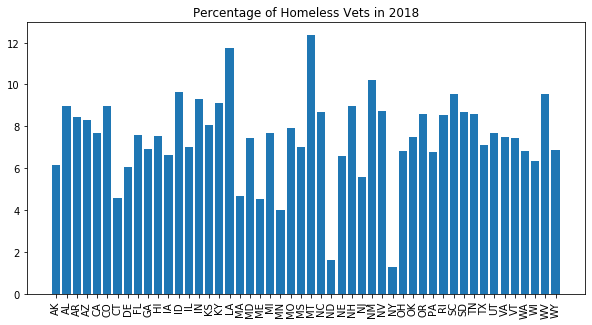

In [6]:
states = vetcsv['State']
homelessvets = vetcsv['Percentage']

plt.figure(figsize=(10,5))
plt.bar(x=states,height=homelessvets)
plt.tick_params(axis='x',labelrotation=90)
plt.title('Percentage of Homeless Vets in 2018')
plt.savefig("Images/Homeless Vets.png",bbox_inches='tight')
plt.show()